In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [6]:
n = 300 

def generate_grade(percent):
    if percent is None:
        return None
    elif percent >= 90:
        return 'A'
    elif percent >= 80:
        return 'B'
    elif percent >= 70:
        return 'C'
    elif percent >= 60:
        return 'D'
    else:
        return 'F'

data = {
    'student_id': [f"S{1000 + i}" for i in range(n)],
    'gender': [random.choice(['Male', 'Female']) for _ in range(n)],
    'age': [random.choice([random.randint(17, 26), None]) if random.random() < 0.07 else random.randint(17, 26) for _ in range(n)],
    'education': [random.choice(['Bachelor', 'Master']) for _ in range(n)],
    'group': [random.choice(['A', 'B']) for _ in range(n)],
    'course_type': [random.choice(['Free', 'Paid', 'Scholarship']) for _ in range(n)],
    'attendance_rate': [
        round(np.random.normal(loc=85, scale=15), 1) if random.random() > 0.03 else None
        for _ in range(n)
    ],
    'study_hours_per_week': [random.randint(2, 25) for _ in range(n)],
    'marks': [
        round(np.random.normal(loc=75, scale=15), 1) if random.random() > 0.02 else None
        for _ in range(n)
    ]
}

percent = []
for m, a in zip(data['marks'], data['attendance_rate']):
    if m is not None and a is not None:
        percent.append(round(m * 0.7 + a * 0.3, 1))
    else:
        percent.append(None)

data['percent'] = percent
data['grade'] = [generate_grade(p) for p in percent]

df = pd.DataFrame(data)
df

,student_id,gender,age,education,group,course_type,attendance_rate,study_hours_per_week,marks,percent,grade
0,S1000,Male,22.0,Master,A,Free,103.4,9,80.7,87.5,B
1,S1001,Female,25.0,Bachelor,B,Scholarship,106.4,15,73.9,83.7,B
2,S1002,Female,21.0,Bachelor,A,Free,82.7,17,96.4,92.3,A
3,S1003,Female,21.0,Master,B,Paid,84.0,16,74.9,77.6,C
4,S1004,Male,18.0,Bachelor,A,Scholarship,94.9,25,94.9,94.9,A
...,...,...,...,...,...,...,...,...,...,...,...
295,S1295,Female,18.0,Master,A,Paid,106.3,19,61.8,75.1,C
296,S1296,Male,NaN,Master,B,Free,61.0,23,64.9,63.7,D
297,S1297,Male,23.0,Bachelor,B,Scholarship,43.4,11,90.2,76.2,C
298,S1298,Male,23.0,Bachelor,A,Scholarship,78.4,11,84.4,82.6,B


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            300 non-null    object 
 1   gender                300 non-null    object 
 2   age                   290 non-null    float64
 3   education             300 non-null    object 
 4   group                 300 non-null    object 
 5   course_type           300 non-null    object 
 6   attendance_rate       285 non-null    float64
 7   study_hours_per_week  300 non-null    int64  
 8   marks                 292 non-null    float64
 9   percent               278 non-null    float64
 10  grade                 278 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 25.9+ KB


In [5]:
df.describe()

,age,attendance_rate,study_hours_per_week,marks,percent
count,189.000000,193.000000,200.000000,195.000000,188.000000
mean,21.449735,84.679275,13.450000,74.749231,77.453723
std,2.899718,15.944029,6.726345,15.810708,12.362360
min,17.000000,39.200000,2.000000,38.100000,48.600000
25%,19.000000,73.200000,8.000000,64.550000,70.225000
50%,21.000000,85.200000,13.000000,75.000000,77.500000
75%,24.000000,95.700000,19.000000,85.050000,85.775000
max,26.000000,125.700000,25.000000,120.100000,112.800000


In [6]:
df.head()

,student_id,gender,age,education,group,course_type,attendance_rate,study_hours_per_week,marks,percent,grade
0,S1000,Female,19.0,Master,A,Scholarship,75.2,15,43.5,53.0,F
1,S1001,Male,23.0,Bachelor,B,Paid,69.7,7,83.6,79.4,C
2,S1002,Male,26.0,Bachelor,B,Paid,NaN,9,80.1,NaN,None
3,S1003,Male,20.0,Bachelor,B,Free,91.4,18,106.6,102.0,A
4,S1004,Female,26.0,Master,A,Scholarship,103.7,12,62.7,75.0,C


In [8]:
df.isnull().sum()

student_id               0
gender                   0
age                     10
education                0
group                    0
course_type              0
attendance_rate         15
study_hours_per_week     0
marks                    8
percent                 22
grade                   22
dtype: int64

In [9]:
df['age'] = df['age'].fillna(int(df['age'].median())).astype('int')
df['attendance_rate'] = df['attendance_rate'].fillna(df['attendance_rate'].mean())
df['marks'] = df['marks'].fillna(df['marks'].mean())
df['percent'] = round(df['marks'] * 0.7 + df['attendance_rate'] * 0.3, 1)

def generate_grade(percent):
    if percent >= 90:
        return 'A'
    elif percent >= 80:
        return 'B'
    elif percent >= 70:
        return 'C'
    elif percent >= 60:
        return 'D'
    else:
        return 'F'

df['grade'] = df['percent'].apply(generate_grade)
df

,student_id,gender,age,education,group,course_type,attendance_rate,study_hours_per_week,marks,percent,grade
0,S1000,Male,22,Master,A,Free,103.4,9,80.7,87.5,B
1,S1001,Female,25,Bachelor,B,Scholarship,106.4,15,73.9,83.6,B
2,S1002,Female,21,Bachelor,A,Free,82.7,17,96.4,92.3,A
3,S1003,Female,21,Master,B,Paid,84.0,16,74.9,77.6,C
4,S1004,Male,18,Bachelor,A,Scholarship,94.9,25,94.9,94.9,A
...,...,...,...,...,...,...,...,...,...,...,...
295,S1295,Female,18,Master,A,Paid,106.3,19,61.8,75.1,C
296,S1296,Male,21,Master,B,Free,61.0,23,64.9,63.7,D
297,S1297,Male,23,Bachelor,B,Scholarship,43.4,11,90.2,76.2,C
298,S1298,Male,23,Bachelor,A,Scholarship,78.4,11,84.4,82.6,B


In [10]:
df.isnull().sum()

student_id              0
gender                  0
age                     0
education               0
group                   0
course_type             0
attendance_rate         0
study_hours_per_week    0
marks                   0
percent                 0
grade                   0
dtype: int64

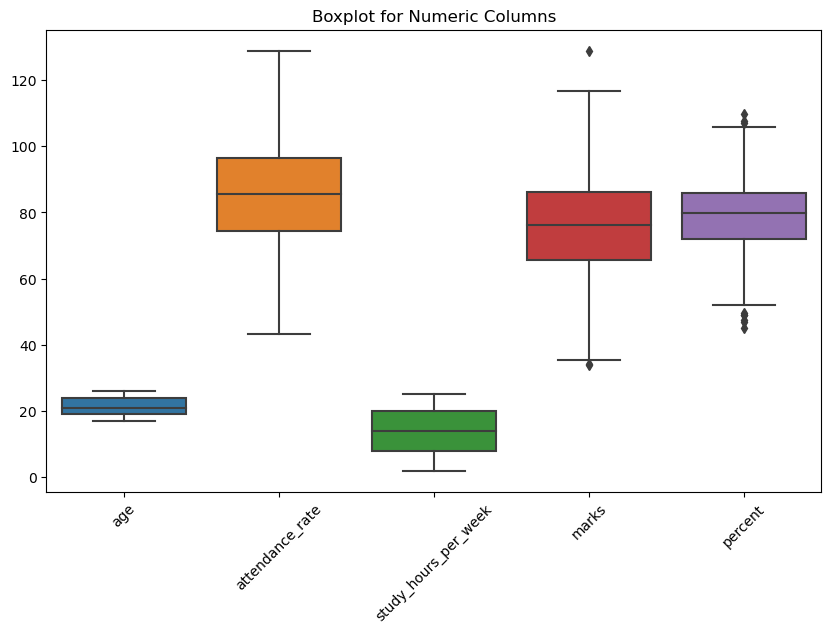

In [11]:
numeric_columns=['age','attendance_rate','study_hours_per_week','marks','percent']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [12]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

df_no_outliers = df[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df.shape)
print("Dataset after outlier removal:", df_no_outliers.shape)


Dataset before outlier removal: (300, 11)
Dataset after outlier removal: (290, 11)


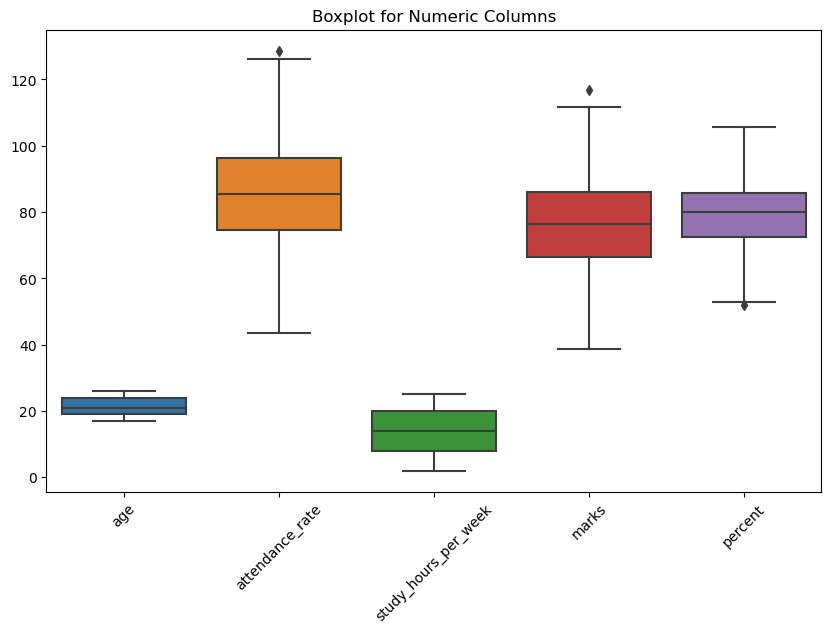

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['age', 'attendance_rate', 'study_hours_per_week', 'marks', 'percent']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head() 

,age,attendance_rate,study_hours_per_week,marks,percent
0,0.222222,0.416185,0.565217,0.065854,0.068536
1,0.666667,0.352601,0.217391,0.554878,0.479751
2,1.000000,0.525772,0.304348,0.512195,0.512461
3,0.333333,0.603468,0.695652,0.835366,0.831776
4,1.000000,0.745665,0.434783,0.300000,0.411215


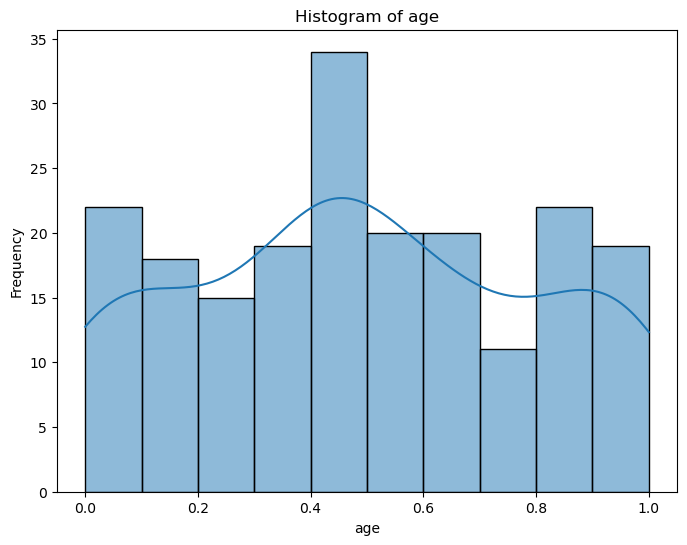

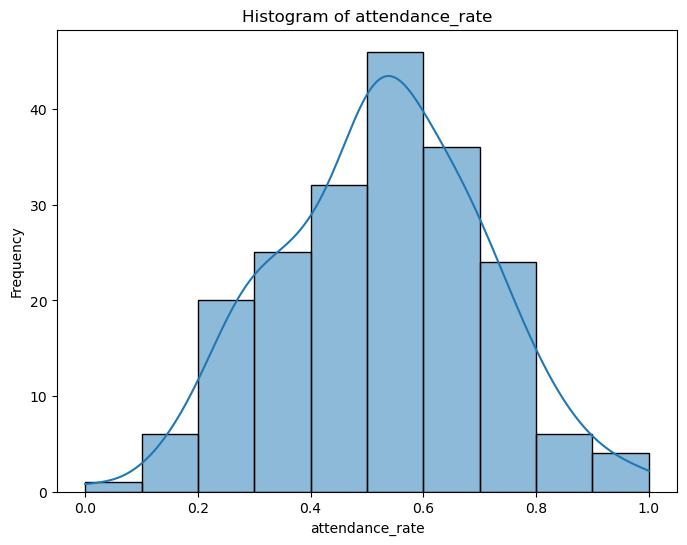

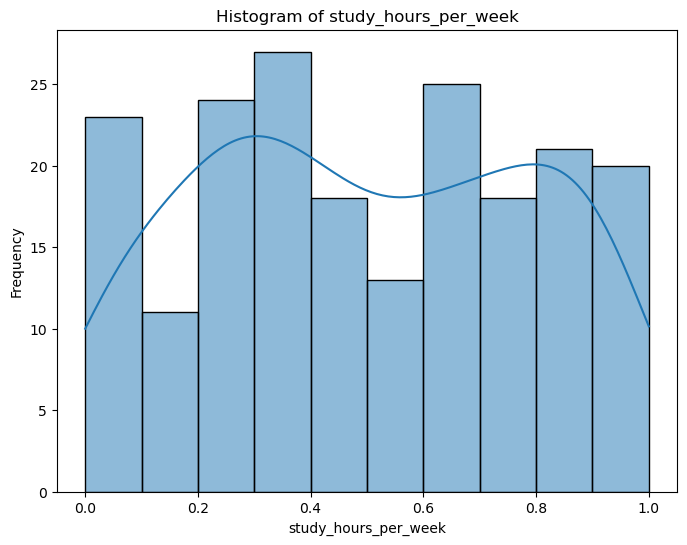

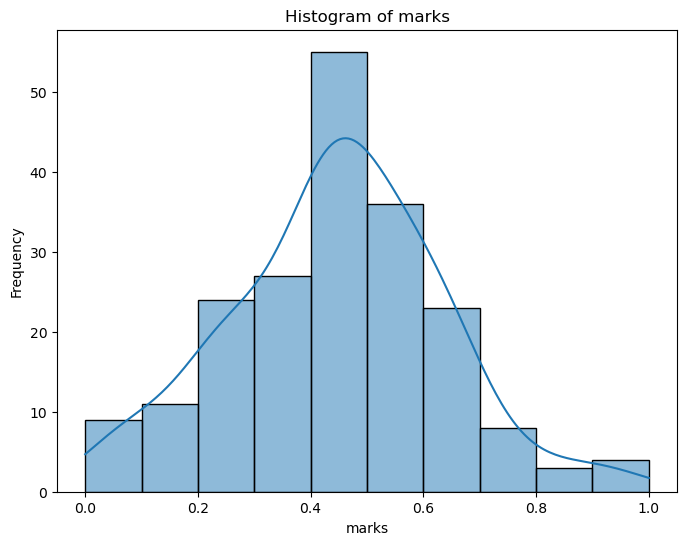

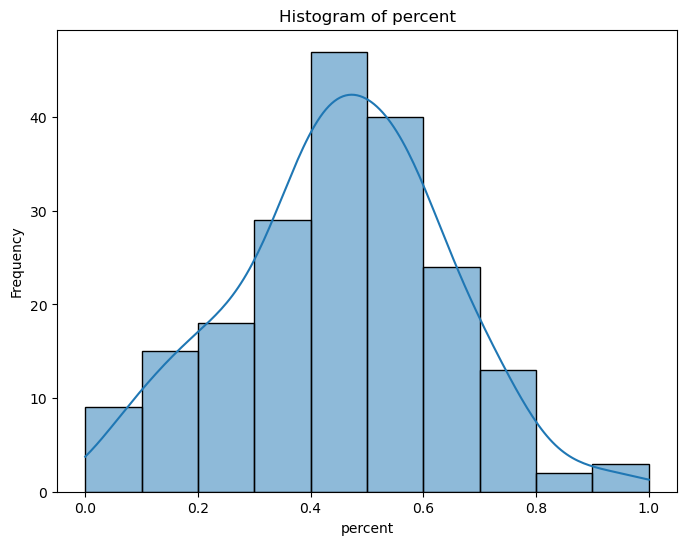

In [19]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=10, kde=True)  # `kde=True` adds a smooth density curve
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

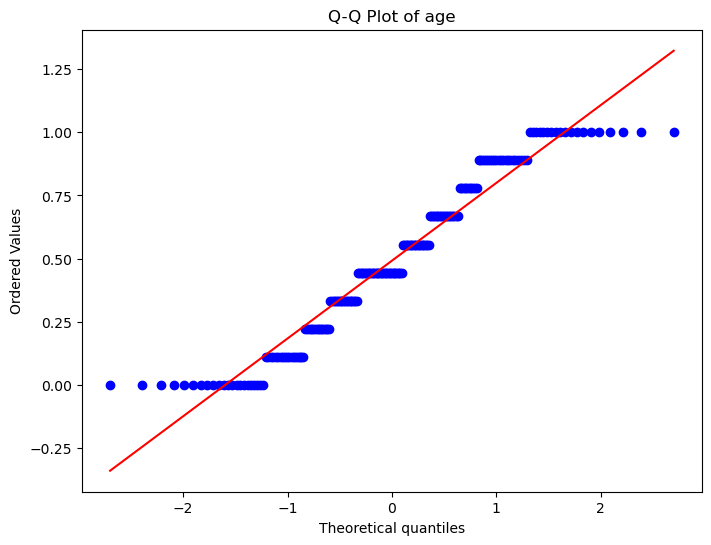

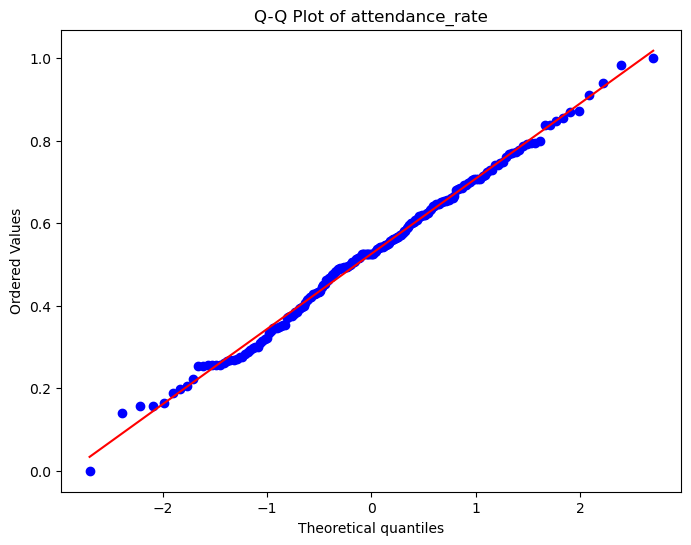

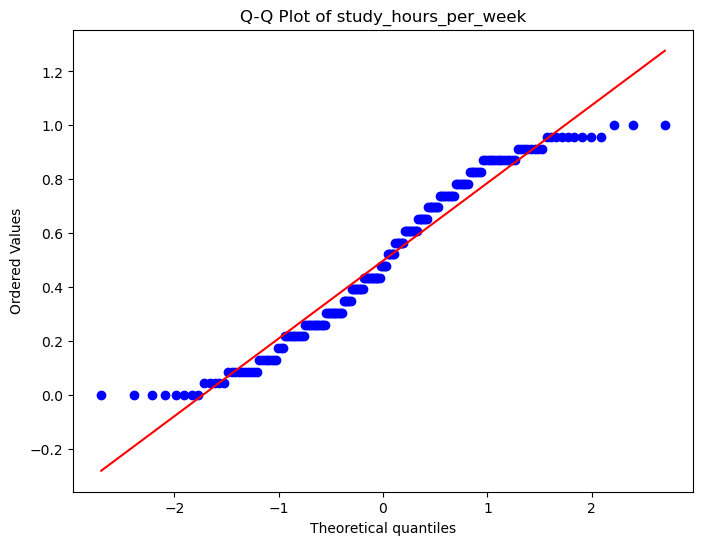

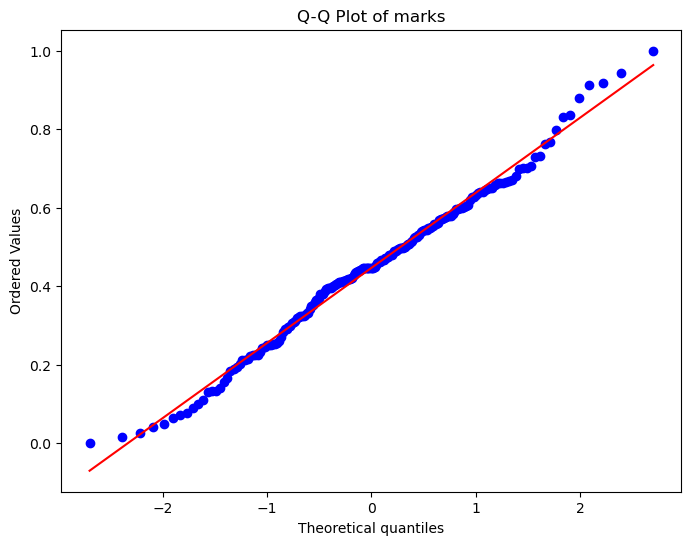

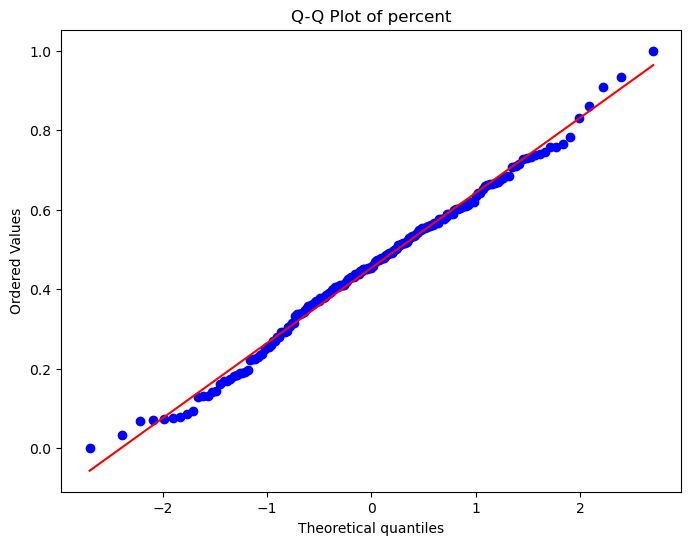

In [21]:
import scipy.stats as stats
for col in num_cols:
    plt.figure(figsize=(8, 6))
    stats.probplot(df[col], dist="norm", plot=plt)  
    plt.title(f'Q-Q Plot of {col}')
    plt.show()